### Comentarios: 

Las variables "gk_" solo contienen información para los GK (arqueros)  
Las variables "goalkeeping_" contienen información para todos los jugadores incluidos los arqueros y en ese caso ambas variables tienen el mismo valor.  
**Decidimos descartar las variables "gk_"**

Generamos un nuevo atributo **position** el cual toma como valor, el primer elemento de **player_positions**, dado que ese primer elemento es la posicion preferida por el jugador. 

Las siguientes variables no se utilizan para los arqueros, por lo que si las consideramos en la evaluación, no serán considerados los arqueros en ese análisis.
**pace, shooting, passing, dribbling, defending, physic**


### 1- Inicialización del Entorno

Herramientas para la carga de Datos, manipulación y Visualización

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [3]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

### 2- Exploración de la Base

In [4]:
df=pd.read_csv("archive/players_20.csv")

np.random.seed(73)
df.sample(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4976,211323,https://sofifa.com/player/211323/pol-garcia-te...,Pol García,Pol García Tena,24,1995-02-18,183,75,Spain,Sint-Truidense VV,70,75,2100000,6000,"CB, LB",Left,1,3,2,Medium/Medium,Normal,No,3300000.0,NaN,LCB,4.0,NaN,2018-07-11,2020.0,NaN,NaN,62.0,32.0,63.0,61.0,69.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,22,69,65,27,59,...,61,63,59,65,68,49,75,53,68,37,71,70,22,62,52,66,68,70,71,7,6,7,7,6,48+2,48+2,48+2,53+2,51+2,51+2,51+2,53+2,55+2,55+2,55+2,56+2,59+2,59+2,59+2,56+2,64+2,66+2,66+2,66+2,64+2,65+2,68+2,68+2,68+2,65+2
2729,234730,https://sofifa.com/player/234730/valentin-rosi...,V. Rosier,Valentin Rosier,22,1996-08-19,175,71,France,Sporting CP,73,80,5000000,9000,"RB, LB",Right,1,2,3,High/Medium,Normal,No,11000000.0,NaN,SUB,19.0,NaN,2019-07-01,2024.0,NaN,NaN,76.0,47.0,63.0,73.0,71.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,40,63,68,40,73,...,78,74,67,71,77,61,67,75,66,52,73,73,58,58,39,67,67,74,73,8,13,10,10,9,61+2,61+2,61+2,65+2,64+2,64+2,64+2,65+2,64+2,64+2,64+2,67+2,66+2,66+2,66+2,67+2,71+2,69+2,69+2,69+2,71+2,71+2,70+2,70+2,70+2,71+2
16512,230942,https://sofifa.com/player/230942/josh-pask/20/...,J. Pask,Josh Pask,21,1997-11-01,187,76,England,Coventry City,57,68,160000,1000,"CB, RB",Right,1,2,2,Medium/Medium,Lean,Yes,312000.0,NaN,SUB,16.0,NaN,2019-07-01,2022.0,NaN,NaN,59.0,26.0,38.0,39.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,21,55,48,20,32,...,55,62,53,41,52,38,64,52,70,26,67,52,33,38,21,47,58,54,52,10,8,14,7,14,39+2,39+2,39+2,38+2,38+2,38+2,38+2,38+2,39+2,39+2,39+2,39+2,41+2,41+2,41+2,39+2,47+2,49+2,49+2,49+2,47+2,49+2,55+2,55+2,55+2,49+2
3483,203161,https://sofifa.com/player/203161/marcel-franke...,M. Franke,Marcel Franke,26,1993-04-05,193,90,Germany,Hannover 96,72,76,3500000,19000,CB,Right,1,2,2,Medium/High,Normal,No,5900000.0,#Strength,RCB,28.0,NaN,2019-07-01,2022.0,NaN,NaN,50.0,31.0,42.0,44.0,72.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,24,76,59,24,42,...,47,52,37,62,38,49,54,63,90,32,71,67,22,32,30,56,73,75,69,15,9,11,15,10,45+2,45+2,45+2,40+2,42+2,42+2,42+2,40+2,42+2,42+2,42+2,43+2,49+2,49+2,49+2,43+2,57+2,62+2,62+2,62+2,57+2,60+2,70+2,70+2,70+2,60+2


In [5]:
# df.filter(regex='(team_position|long_name|gk_diving|goalkeeping_diving)')
df[df["team_position"] == "GK"][['player_positions','long_name','overall','gk_diving','goalkeeping_diving']]
# df[df['gk_diving', 'goalkeeping_diving']]

,player_positions,long_name,overall,gk_diving,goalkeeping_diving
3,GK,Jan Oblak,91,87.0,87
6,GK,Marc-André ter Stegen,90,88.0,88
13,GK,Alisson Ramses Becker,89,85.0,85
14,GK,David De Gea Quintana,89,90.0,90
25,GK,Ederson Santana de Moraes,88,86.0,86
28,GK,Thibaut Courtois,88,85.0,85
30,GK,Samir Handanovič,88,88.0,88
31,GK,Manuel Neuer,88,87.0,87
32,GK,Hugo Lloris,88,89.0,89
60,GK,Wojciech Szczęsny,86,85.0,85


In [6]:
df[df['player_positions'] != 'GK'].sort_values(by='goalkeeping_diving', ascending=False)[['player_positions','long_name','overall','goalkeeping_diving']]

,player_positions,long_name,overall,goalkeeping_diving
990,"RB, RM",Giovanni Luis Quintana,78,75
407,"CB, CDM",Jaime Nicolás Frendado,81,58
327,CB,Egidio Maestre Schetino,82,58
15254,"RM, LM",Peter Vincenti,60,37
1423,CB,Phil Jagielka,76,32
...,...,...,...,...
8386,CB,Scott Cuthbert,67,1
14398,ST,Kyle Wootton,61,1
391,"CDM, CM",Fernando Francisco Reges,81,1
9690,"CM, CDM",Sam Mantom,66,1


In [7]:
# print(df.columns)
print(len(df.columns))

for i in df.columns:
    print("'"+i+"'", end=", ")

104
'sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'pow

In [8]:
# Para saber los valores seteados a las opciones

# print("Default max_rows: {} and min_rows: {}".format(
# pd.get_option("max_rows"), pd.get_option("min_rows")))

# print("Default max_columns: {} ".format(
# pd.get_option("max_columns")))

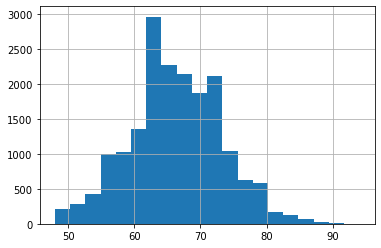

In [9]:
df['overall'].hist(bins = 20)

In [10]:
df['position'] = ''

for i in df.index:
    df['position'][i] = df['player_positions'][i].split(',')[0]

In [11]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,RW
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,ST
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,LW
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Sho

In [12]:
best_players_per_position=df.iloc[df.groupby(df['position'])['overall'].idxmax()][['position','short_name','overall','value_eur']]
best_players_per_position.sort_values(by='overall', ascending=False)

,position,short_name,overall,value_eur
0,RW,L. Messi,94,95500000
1,ST,Cristiano Ronaldo,93,58500000
2,LW,Neymar Jr,92,105500000
5,CAM,K. De Bruyne,91,90000000
3,GK,J. Oblak,91,77500000
7,CB,V. van Dijk,90,78000000
8,CM,L. Modrić,90,45000000
15,CDM,N. Kanté,89,66000000
22,CF,A. Griezmann,89,69000000
51,LB,Jordi Alba,87,40000000


In [13]:
pd.DataFrame(df.position.value_counts().sort_index())

,position
CAM,1146
CB,3162
CDM,1424
CF,113
CM,2193
GK,2036
LB,1303
LM,1049
LW,378
LWB,90


In [14]:
club_avg_overall=df.groupby("club")["overall"].mean().reset_index().sort_values("overall",ascending=False)
# club_avg_overall[club_avg_overall['club'].isin(['River Plate','Boca Juniors'])] #.head(10)
club_avg_overall.head(8)

,club,overall
226,FC Bayern München,81.304348
505,Real Madrid,80.121212
350,Juventus,80.060606
650,Uruguay,78.608696
224,FC Barcelona,78.363636
407,Mexico,78.000000
426,Netherlands,78.000000
166,Colombia,78.000000


### 3- Preparación de los Datos

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base  
y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [22]:
# n=10000 #cantidad de jugadores a considerar

# df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df[(df['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

33 variables numéricas de desempeño según habilidad


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [23]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [24]:
df_skills=df_n[skills_ratings]

In [25]:
df_skills.head(5)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14
1,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14
2,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15
3,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90
4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8


In [55]:
skills_ratings[12]

'movement_agility'

### 4- Exploratorio Visual para Clustering

In [56]:
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12]
skill_2=skills_ratings[21]



graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [57]:
#Gráfico 2

#Elegimos un jugador
recherche_joueur=(df_n["short_name"]=='L. Suárez') & (df_n["nationality"]=='Uruguay')
recherche_joueur2=(df_n["short_name"]=='L. Messi') 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12]  #6
skill_2=skills_ratings[21]  #25


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

joueur_recherche2 =go.Scatter(x=df_skills.loc[recherche_joueur2,skill_1], y=df_skills.loc[recherche_joueur2,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur2,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[5],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche,joueur_recherche2]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### 5.-Clustering-con-Kmeans
ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo.

In [63]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  12234848.447231393


Utilizamos el criterio del codo para obtener la cantidad mas adecuada de clusters

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

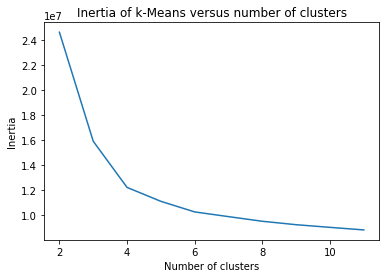

In [61]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [64]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12]
skill_2=skills_ratings[21]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### 6.-Clustering-Mean-Shift

In [31]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters

Numero estimado de clusters para Mean Shift : 4


In [59]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Seleccionamos las variables mentality_interceptions y movement_agility, con las cuales encontramos 4 clusters tanto con mean shift como con K means (encontrado utilizando criterio del codo).  

En la gráfica de Mean Shift los clusters encontrados son:  
Rojo -> Arqueros  
Verde -> Delanteros  
Azul -> Mediocampistas  
Naranja -> Defensores  